In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mc

In [2]:
FTRL = np.load('FTRL.npz')
OFTRL = np.load('OFTRL.npz')
counter = np.load('counter_example.npz')
OFTRL_const = np.load('OFTRL_const_lr.npz')
counter_const = np.load('counter_example_const_lr.npz')

In [3]:
T_lst_FTRL = FTRL['T_lst']
T_lst_OFTRL = OFTRL['T_lst']
T_lst_OFTRL_const = OFTRL_const['T_lst']
T_lst_counter = counter['T_lst']
T_lst_counter_const = counter_const['T_lst']

In [4]:
FTRL_NE = FTRL['NE_gap_lst']
OFTRL_NE = OFTRL['NE_gap_lst']
counter_NE = counter['NE_gap_lst']
OFTRL_const_NE = OFTRL_const['NE_gap_lst']
counter_const_NE = counter_const['NE_gap_lst']

In [5]:
# Calculating the slope
b = np.log10(counter_NE)
a = np.log10(T_lst_counter)
ans = np.polyfit(a, b, deg = 1)
print('INPG:', ans[0])

b = np.log10(FTRL_NE)
a = np.log10(T_lst_FTRL)
ans = np.polyfit(a, b, deg = 1)
print('FTRL:', ans[0])

b = np.log10(OFTRL_NE)
a = np.log10(T_lst_OFTRL)
ans = np.polyfit(a, b, deg = 1)
print('OFTRL:', ans[0])

b = np.log10(OFTRL_const_NE)
a = np.log10(T_lst_OFTRL_const)
ans = np.polyfit(a, b, deg = 1)
print('OFTRL constant learning rate:', ans[0])

INPG: -0.3084148803479788
FTRL: -0.5701077919936827
OFTRL: -0.8348039713663777
OFTRL constant learning rate: -1.0003724817988362


In [6]:
x_data_lst = [T_lst_counter_const, T_lst_counter, T_lst_FTRL, T_lst_OFTRL, T_lst_OFTRL_const]
y_data_lst = [counter_const_NE, counter_NE, FTRL_NE, OFTRL_NE, OFTRL_const_NE]
label_lst = (r'INPG$~(\beta_t = 1,\eta = 0.1)$', r'INPG$~(\beta_t = 1, \eta = T^{-1/2})$', 
             r'FTRL$~(\beta_t = \alpha_t, \eta = T^{-1/2})$',
             r'OFTRL$~(\beta_t = \alpha_t, \eta = T^{-1/6})$',
            r'OFTRL$~(\beta_t = \alpha_t, \eta = 1)$')

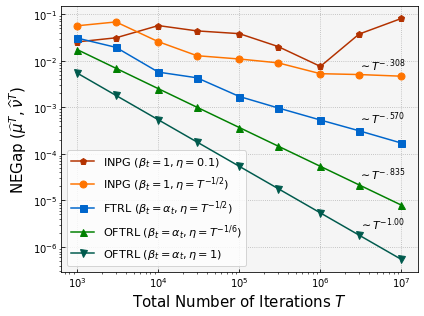

In [7]:
markers = ['p', 'o', 's', '^', 'v']

plt.rcParams['legend.title_fontsize'] = 'small'

#coverage_mode_2 = np.load("./data/coverage_mode_2.npy")
#coverage_mode_2_analytical = np.load("./data/coverage_mode_2_analytical.npy")
kappa_vec = np.linspace(0.02, 0.5, 25)
alpha_vec = [0.7, 0.8, 0.9, 0.95,1]
fig, ax = plt.subplots(figsize=(6, 4.5))
ax.set_facecolor('whitesmoke')
ax.set_axisbelow(True)
ax.tick_params(direction='in')
plt.grid(ls='dotted')
#plt.xlim([0.02, 0.5])
#plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5], fontsize='small')
#plt.yticks(alpha_vec + [0.7, 0.6], fontsize='small')
# plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0], fontsize='small')
fn = "./main.pdf"
# color_1, color_2 = np.array([0, 0, 1]), np.array([1, 0, 0])
color_1, color_2 = np.array(mc.to_rgb("orange")), np.array(mc.to_rgb("green"))
color_3 = np.array(mc.to_rgb("blue"))
color_4 = np.array(mc.to_rgb("red"))
colors = [(1-alpha) * color_1 + alpha * color_2 for alpha in [0.3, 0, 1, 0.5, .75]]
colors[0] = 0.4*color_4 + 0.3*color_1
colors[1] = 0.7*color_1 + 0.3*color_4
colors[2] = color_3*0.8 + 0.8*color_2
colors[3] = color_2
colors[4] = color_3*0.3 + 0.7*color_2

# plt.plot(alpha_vec, alpha_vec, linestyle='--', color='black')
kappa_tangent_upper = [0.5, 0.3, 0.2]
for i_alpha in range(len(alpha_vec)):
    x_data = x_data_lst[i_alpha]
    y_data = y_data_lst[i_alpha]
    alpha = alpha_vec[i_alpha]
    #kappa_tangent = np.linspace(0.0, kappa_tangent_upper[i_alpha], 101)
    #plt.plot([0.02, 0.52], [alpha, alpha], ls='dotted',
    #         color='k', alpha=1.0, zorder=1)
    #plt.plot(kappa_tangent, alpha - (alpha-.5) * kappa_tangent, ls='-.', color='k', alpha=0.75,
    #         label=r'$\alpha-(1-\alpha/2)\kappa$' if i_alpha==0 else None, zorder=2)
    label = label_lst[i_alpha]
    #coverages = coverage_mode_2[:, i_alpha, :]
    #mean_coverage, std_coverage = np.mean(coverages, axis=1), np.std(coverages, axis=1)
    # plt.errorbar(kappa_vec, mean_coverage, yerr=std_coverage, label=label,
    #              color=colors[i_alpha],
    #              marker=markers[i_alpha], ms=3, capsize=2.0)
    plt.plot(x_data, y_data, label=label,
             color=colors[i_alpha],
             marker=markers[i_alpha], ms=7, zorder=10)
    plt.xscale('log')
    plt.yscale('log')
    #plt.fill_between(kappa_vec, mean_coverage - std_coverage, mean_coverage + std_coverage,
    #                 color=colors[i_alpha], alpha=0.5, zorder=9)
    #coverages_analytical = coverage_mode_2_analytical[:, i_alpha]
    #label = r'$\alpha=$' + f'{alpha:.2f} analytical'
    #plt.plot(kappa_vec, coverages_analytical, color=colors[i_alpha], ls='--', label=label, zorder=3)

plt.text(0.9, 0.78, r'$\sim T^{-.308}$', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 11)
plt.text(0.9, 0.58, r'$\sim T^{-.570}$', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 11)
plt.text(0.9, 0.37, r'$\sim T^{-.835}$', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 11)
plt.text(0.9, 0.18, r'$\sim T^{-1.00}$', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 11)

plt.xlabel(r"Total Number of Iterations $T$", fontsize=15)
plt.ylabel(r"${\rm NEGap}~(\widehat{\mu}^T, \widehat{\nu}^T)$", fontsize=15) #$V_1^{\dagger,\widehat{\nu}^T}(s_1) \!-\!V_1^{\widehat{\mu}^T, \dagger}(s_1)$
plt.legend(fontsize=11.3)
plt.tight_layout()
plt.savefig(fn)
#plt.close()


In [8]:
# ---------------------------------------- Experiment 2 Plot --------------------------------------

In [9]:
FTRL = np.load('FTRL_single_trial.npz')
counter = np.load('counter_example_single_trial.npz')

In [10]:
FTRL_layer_1 = FTRL['NE_gap_layer_1_lst']
FTRL_layer_2 = FTRL['NE_gap_layer_2_lst']
counter_layer_1 = counter['NE_gap_layer_1_lst']
counter_layer_2 = counter['NE_gap_layer_2_lst']
label_lst = [r'INPG$~(\beta_t = 1, \eta = T^{-1/2})$', 
             r'FTRL$~(\beta_t = \alpha_t, \eta = T^{-1/2})$']

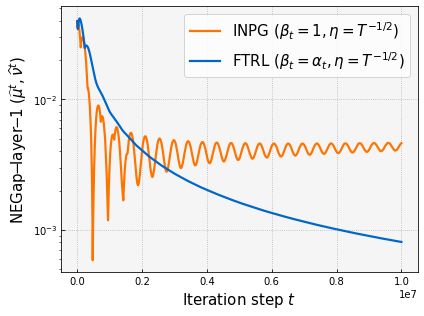

In [11]:
plt.rcParams['legend.title_fontsize'] = 'small'

fig, ax = plt.subplots(figsize=(6, 4.5))
ax.set_facecolor('whitesmoke')
ax.set_axisbelow(True)
ax.tick_params(direction='in')
plt.grid(ls='dotted')
fn = "./main2.pdf"

x_data = np.array([i+1 for i in range(np.size(FTRL_layer_1))])
plt.plot(x_data,(counter_layer_1), label=label_lst[0], linewidth = 2.2,
             color=colors[1])#_1)
plt.plot(x_data, (FTRL_layer_1),label=label_lst[1], linewidth = 2.2,
             color=colors[2])#_2)
#plt.xscale('log')
plt.yscale('log')
    #plt.fill_between(kappa_vec, mean_coverage - std_coverage, mean_coverage + std_coverage,
    #                 color=colors[i_alpha], alpha=0.5, zorder=9)
    #coverages_analytical = coverage_mode_2_analytical[:, i_alpha]
    #label = r'$\alpha=$' + f'{alpha:.2f} analytical'
    #plt.plot(kappa_vec, coverages_analytical, color=colors[i_alpha], ls='--', label=label, zorder=3)

    
plt.xlabel(r"Iteration step $t$", fontsize=15)
plt.ylabel(r"${\rm NEGap\!\!-\!\!layer\!\!-\!\!1}~(\widehat{\mu}^t, \widehat{\nu}^t)$", fontsize=15) #$V_1^{\dagger,\widehat{\nu}^T}(s_1) \!-\!V_1^{\widehat{\mu}^T, \dagger}(s_1)$
plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig(fn)
#plt.close()

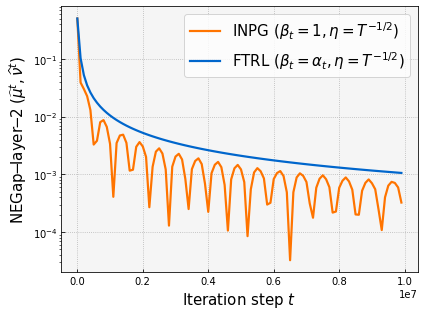

In [12]:
plt.rcParams['legend.title_fontsize'] = 'small'

fig, ax = plt.subplots(figsize=(6, 4.5))
ax.set_facecolor('whitesmoke')
ax.set_axisbelow(True)
ax.tick_params(direction='in')
plt.grid(ls='dotted')
fn = "./main3.pdf"

x_data = np.array([i+1 for i in range(np.size(FTRL_layer_1))])
plt.plot(x_data[0::100000],(counter_layer_2[0::100000]), label=label_lst[0], linewidth = 2.2,
             color=colors[1])#_1)
plt.plot(x_data[0::100000], (FTRL_layer_2[0::100000]),label=label_lst[1], linewidth = 2.2,
             color=colors[2])#_2)
#plt.xscale('log')
plt.yscale('log')
    #plt.fill_between(kappa_vec, mean_coverage - std_coverage, mean_coverage + std_coverage,
    #                 color=colors[i_alpha], alpha=0.5, zorder=9)
    #coverages_analytical = coverage_mode_2_analytical[:, i_alpha]
    #label = r'$\alpha=$' + f'{alpha:.2f} analytical'
    #plt.plot(kappa_vec, coverages_analytical, color=colors[i_alpha], ls='--', label=label, zorder=3)

plt.xlabel(r"Iteration step $t$", fontsize=15)
plt.ylabel(r"${\rm NEGap\!\!-\!\!layer\!\!-\!\!2}~(\widehat{\mu}^t, \widehat{\nu}^t)$", fontsize=15) #$V_1^{\dagger,\widehat{\nu}^T}(s_1) \!-\!V_1^{\widehat{\mu}^T, \dagger}(s_1)$
plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig(fn)
#plt.close()